In [125]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn import metrics
import seaborn as sns
from matplotlib.pyplot import plot
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import display

In [126]:
data_path = 'data.csv'
df = pd.read_csv(data_path)

In [127]:
dummy_fields = ["Layer-1","Layer-2"]

for each in dummy_fields:
    dummies = pd.get_dummies(df[each], prefix=each, drop_first=False)
    df = pd.concat([df,dummies], axis=1)

In [128]:
fields_to_drop = ["Layer-1","Layer-2"]
df = df.drop(fields_to_drop, axis=1)

In [129]:
tar = ['Core_Real', 'CoreImag', 'TotalPower', 'CorePower','EML', 'CLoss']
x = df[["Layer-1_Au",	"Layer-1_Au+Ta2O5",	"Layer-1_TiO2",	"Layer-2_Au",	"Layer-2_Ta2O5",	"Layer-2_TiO2","Ana-1","Ana-2","Thickness","WaveLength"]]
y = df[tar]

In [130]:
quant_features = tar
scaled_features = {}

for each in quant_features:
    mean, std = y[each].mean(), y[each].std()
    scaled_features[each] = [mean, std]
    y.loc[:, each] = (y[each] - mean)/std 

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3436\3167035514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, each] = (y[each] - mean)/std
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3436\3167035514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[:, each] = (y[each] - mean)/std
C:\Users\Administrator\AppData\Local\Temp\ipykernel_3436\3167035514.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [131]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=45)

In [132]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [173]:
# ada = AdaBoostRegressor()
# parameters = {
#     'n_estimators': [40,41,42,43,44,45,46,47,48],
#     'learning_rate': np.linspace(1,2,11),
#     'loss': ['linear', 'square', 'exponential']
# }
# clf = GridSearchCV(ada, parameters, cv=5, verbose=1)
# clf.fit(X_train, y_train)
# clf.best_params_

In [174]:
# n_estimators = np.linspace(21,28,8,dtype=int)
# learning_rate =  np.linspace(0.61,0.63,11)
# loss = ['linear', 'square', 'exponential']

In [175]:
# dt = DecisionTreeRegressor() 
# globCnt = 1000
# v = 0
# ls = np.linspace(1, 100, 100, dtype=int)
# es=0
# for k in ls:
#   print("Running: ", v)
#   v+=1
#   ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.17,n_estimators=0,random_state=42)
#   ada.fit(X_train, y_train[tar[2]])
#   expected_y, predicted_y = y_test[tar[2]], ada.predict(X_test)
#   pre = predicted_y
#   y = y_test[tar[2]].to_numpy()
#   cnt=0
#   for p in range(len(pre)):
#     # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
#     cnt = cnt + abs(y[p] - pre[p])
# #   print(cnt)  
#   if(cnt<globCnt):
#     es = k
#     # print(i)
#     print(es, " ------> " , cnt)  
#     globCnt=cnt
# #     plt.figure(figsize=(10,10))
# #     sns.regplot(x=expected_y, y=predicted_y)

In [176]:
"CLoss"

'CLoss'

In [309]:
# op = 2

# globCnt = 1000
# v = 0
# ls = np.linspace(0.01,2,100)
# es=0
# for k in ls:
#   print("Running: ", v)
#   v+=1
#   dt = DecisionTreeRegressor() 
#   ada = AdaBoostRegressor(base_estimator=dt,learning_rate=k, n_estimators=4,random_state=42)
#   ada.fit(X_train, y_train[:,op])
#   expected_y, predicted_y = y_test[:,op], ada.predict(X_test)
#   pre = predicted_y
#   y = y_test[:,op]
#   cnt=0
#   for p in range(len(pre)):
#     # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
#     cnt = cnt + abs(y[p] - pre[p])
# #   print(cnt)  
#   if(cnt<globCnt):
#     es = k
#     # print(i)
#     print(es, " ------> " , cnt)  
#     globCnt=cnt
# #     plt.figure(figsize=(10,10))
# #     sns.regplot(x=expected_y, y=predicted_y)

0.9988957920142355 0.6269193991415452


<AxesSubplot: >

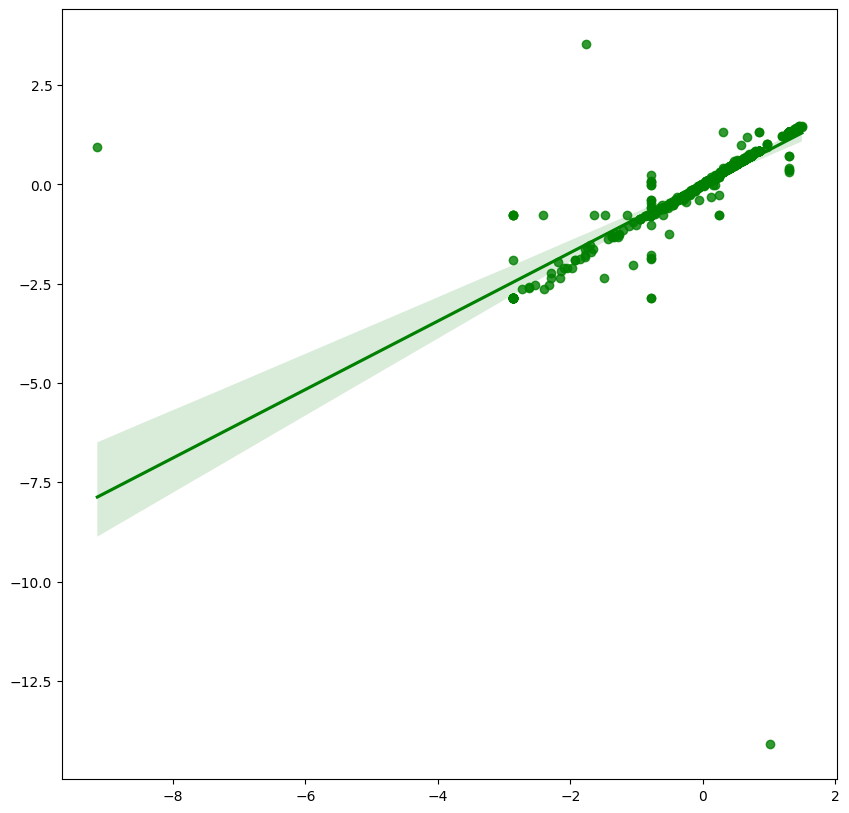

In [123]:
op=4
dt = DecisionTreeRegressor() 
ada = AdaBoostRegressor(n_estimators=100, base_estimator=dt,learning_rate=0.615, loss='exponential', random_state=42)
ada.fit(X_train, y_train[:,op])
expected_y, predicted_y = y_test[:,op], ada.predict(X_test)
print(ada.score(X_train, y_train[:,op]), ada.score(X_test, y_test[:,op]))
plt.figure(figsize=(10,10))
sns.regplot(x=expected_y, y=predicted_y, color='green')

67.4705920116696


<AxesSubplot: >

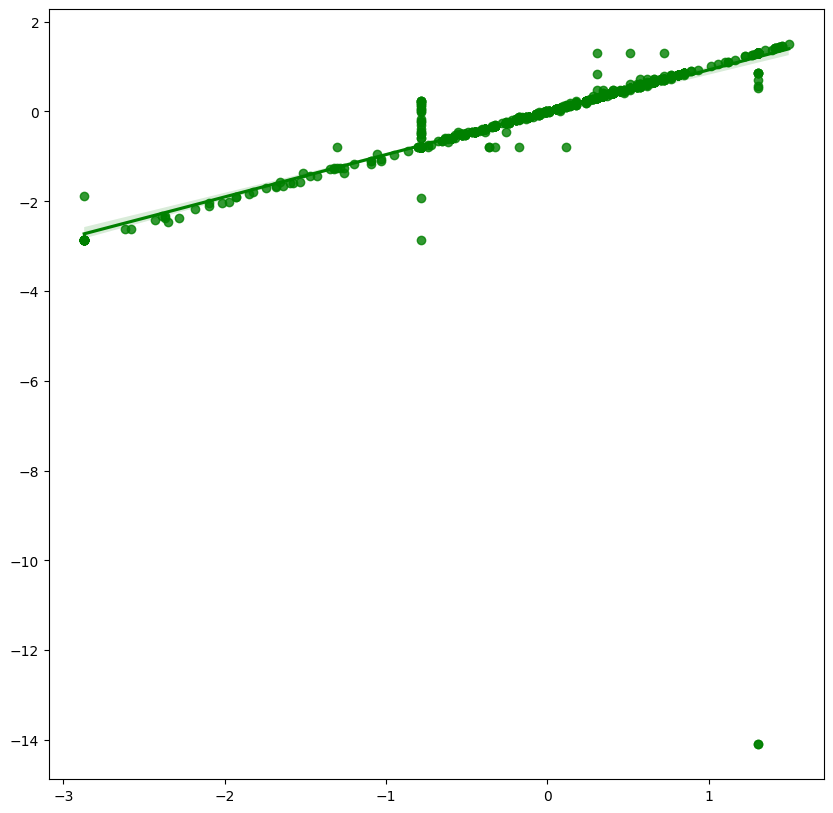

In [100]:
op = 4
dt = DecisionTreeRegressor() 
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.01, n_estimators=48,random_state=42)
ada.fit(X_train, y_train[:,op])
expected_y, predicted_y = y_test[:,op], ada.predict(X_test)
pre = predicted_y
y = y_test[:,op]
cnt=0
for p in range(len(pre)):
# print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
    cnt = cnt + abs(y[p] - pre[p])
print(cnt)    
plt.figure(figsize=(10,10))
sns.regplot(x=expected_y, y=predicted_y, color='green')

Abs Error : 900.7574853602551


<AxesSubplot: >

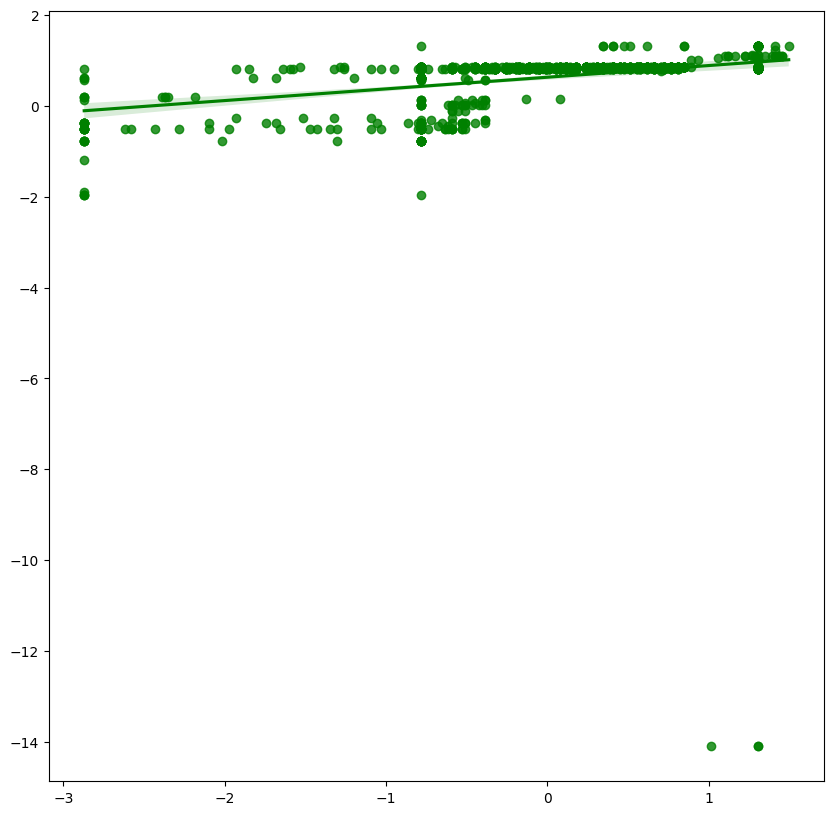

In [101]:
# 28, 0.622, exponential, [17.65578464]
op = 4
dt = DecisionTreeRegressor() 
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=1.4773737373737375, n_estimators=56,random_state=42)
ada.fit(X_train, y_train[:,op])
expected_y, predicted_y = y_test[:,op], ada.predict(X_test)
pre = predicted_y
y = y_test[:,op]
cnt=0
for p in range(len(pre)):
# print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
    cnt = cnt + abs(y[p] - pre[p])
#   print(cnt)  
print('Abs Error :', cnt)  

plt.figure(figsize=(10,10))
sns.regplot(x=expected_y, y=predicted_y, color='green')

25.109849170009266


<AxesSubplot: >

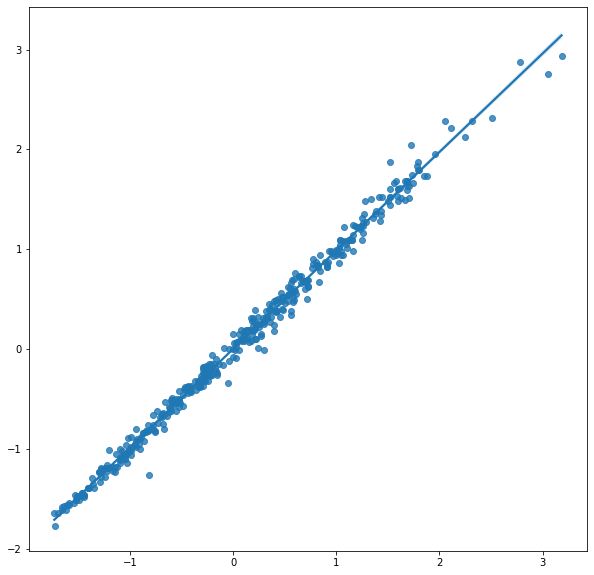

In [313]:
op = 3
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=1.5489795918367346, n_estimators=129,random_state=42)
ada.fit(X_train, y_train[:,op])
expected_y, predicted_y = y_test[:,op], ada.predict(X_test)
pre = predicted_y
y = y_test[:,op]
cnt=0
for p in range(len(pre)):
#     print(y[p],'\t', pre[i], '\t', abs(y[i] - pre[i]))
    cnt = cnt + abs(y[p] - pre[p])
print(cnt)    
plt.figure(figsize=(10,10))
sns.regplot(x=expected_y, y=predicted_y)

7.6524381158905355


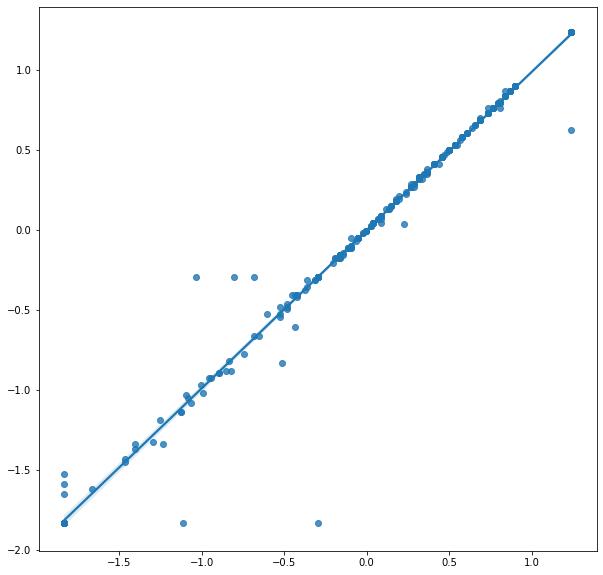

In [314]:
op = 4
dt = DecisionTreeRegressor() 
ada = AdaBoostRegressor(base_estimator=dt,learning_rate=0.1, n_estimators=40,random_state=42)
ada.fit(X_train, y_train[:,op])
expected_y, predicted_y = y_test[:,op], ada.predict(X_test)
pre = predicted_y
y = y_test[:,op]
cnt=0
for p in range(len(pre)):
#     print(y[p],'\t', pre[p], '\t', abs(y[p] - pre[p]))
    cnt = cnt + abs(y[p] - pre[p])

print(cnt)
plt.figure(figsize=(10,10))
sns.regplot(x=expected_y, y=predicted_y).get_figure().savefig('adaCLoss.pdf')    
    

0.9954413126646522 0.9884613709690311
Abs Error : 7.6524381158905355


<AxesSubplot: >

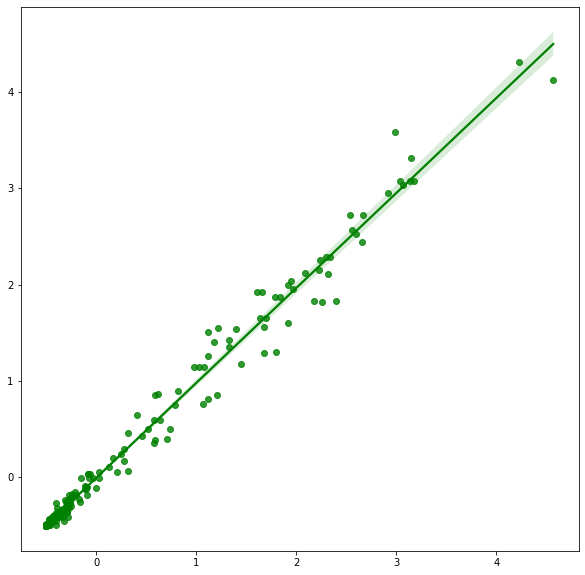

In [315]:
# 28, 0.622, exponential, [17.65578464]
op = 5
dt = DecisionTreeRegressor() 
ada = AdaBoostRegressor(n_estimators=100, base_estimator=dt,learning_rate=0.615, loss='exponential', random_state=42)
ada.fit(X_train, y_train[:,op])
expected_y, predicted_y = y_test[:,op], ada.predict(X_test)
print(ada.score(X_train, y_train[:,op]), ada.score(X_test, y_test[:,op]))

cnt=0
for i in range(len(pre)):
  # print(i)
#   print(i, '\t', y[i],'\t', pre[i],'\t', abs(y[i] - pre[i]))
  cnt = cnt + abs(y[i] - pre[i])
print('Abs Error :', cnt)  

plt.figure(figsize=(10,10))
sns.regplot(x=expected_y, y=predicted_y, color='green')

In [ ]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [ ]:
# xgb1 = XGBRegressor(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  nthread=4,
#  scale_pos_weight=1,
#  seed=42)

In [ ]:
# xgb1.fit(
#     X_train, 
#     y_train, 
#     eval_metric="rmse", 
#     eval_set=[(X_train, y_train), (X_test, y_test)], 
#     verbose=True, 
#     early_stopping_rounds = 20)

In [11]:
np.linspace(0,1,11)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

Running:  0
[0]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[1]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[2]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[3]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[4]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[5]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[6]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[7]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[8]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[9]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[10]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[11]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[12]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[13]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[14]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[15]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[16]	validation_0-rmse:1.13202	validation_1-rmse:1.05988
[17]	validation_0-rmse:1.1320

[13]	validation_0-rmse:0.22484	validation_1-rmse:0.53462
[14]	validation_0-rmse:0.21248	validation_1-rmse:0.53009
[15]	validation_0-rmse:0.20505	validation_1-rmse:0.55911
[16]	validation_0-rmse:0.19615	validation_1-rmse:0.55860
[17]	validation_0-rmse:0.18919	validation_1-rmse:0.55666
[18]	validation_0-rmse:0.18604	validation_1-rmse:0.55639
[19]	validation_0-rmse:0.18112	validation_1-rmse:0.55442
[20]	validation_0-rmse:0.17818	validation_1-rmse:0.55309
[21]	validation_0-rmse:0.17432	validation_1-rmse:0.55189
[22]	validation_0-rmse:0.16986	validation_1-rmse:0.57358
[23]	validation_0-rmse:0.16723	validation_1-rmse:0.57131
[24]	validation_0-rmse:0.16507	validation_1-rmse:0.58896
[25]	validation_0-rmse:0.16149	validation_1-rmse:0.58830
[26]	validation_0-rmse:0.15784	validation_1-rmse:0.58723
[27]	validation_0-rmse:0.15593	validation_1-rmse:0.58744
0.4  ------>  186.4295555562619
Running:  5
[0]	validation_0-rmse:0.68227	validation_1-rmse:0.63126
[1]	validation_0-rmse:0.48521	validation_1-rm

[12]	validation_0-rmse:0.17751	validation_1-rmse:0.44859
[13]	validation_0-rmse:0.16928	validation_1-rmse:0.44884
[14]	validation_0-rmse:0.16117	validation_1-rmse:0.44808
[15]	validation_0-rmse:0.15882	validation_1-rmse:0.44783
[16]	validation_0-rmse:0.15632	validation_1-rmse:0.44753
[17]	validation_0-rmse:0.15326	validation_1-rmse:0.44765
[18]	validation_0-rmse:0.15181	validation_1-rmse:0.44785
[19]	validation_0-rmse:0.14485	validation_1-rmse:0.48575
[20]	validation_0-rmse:0.13344	validation_1-rmse:0.54657
[21]	validation_0-rmse:0.12813	validation_1-rmse:0.54631
[22]	validation_0-rmse:0.12674	validation_1-rmse:0.54608
[23]	validation_0-rmse:0.12475	validation_1-rmse:0.54564
[24]	validation_0-rmse:0.12284	validation_1-rmse:0.54573
[25]	validation_0-rmse:0.12168	validation_1-rmse:0.54597
[26]	validation_0-rmse:0.11799	validation_1-rmse:0.54729
[27]	validation_0-rmse:0.11176	validation_1-rmse:0.58332
[28]	validation_0-rmse:0.10971	validation_1-rmse:0.60298
[29]	validation_0-rmse:0.10794	

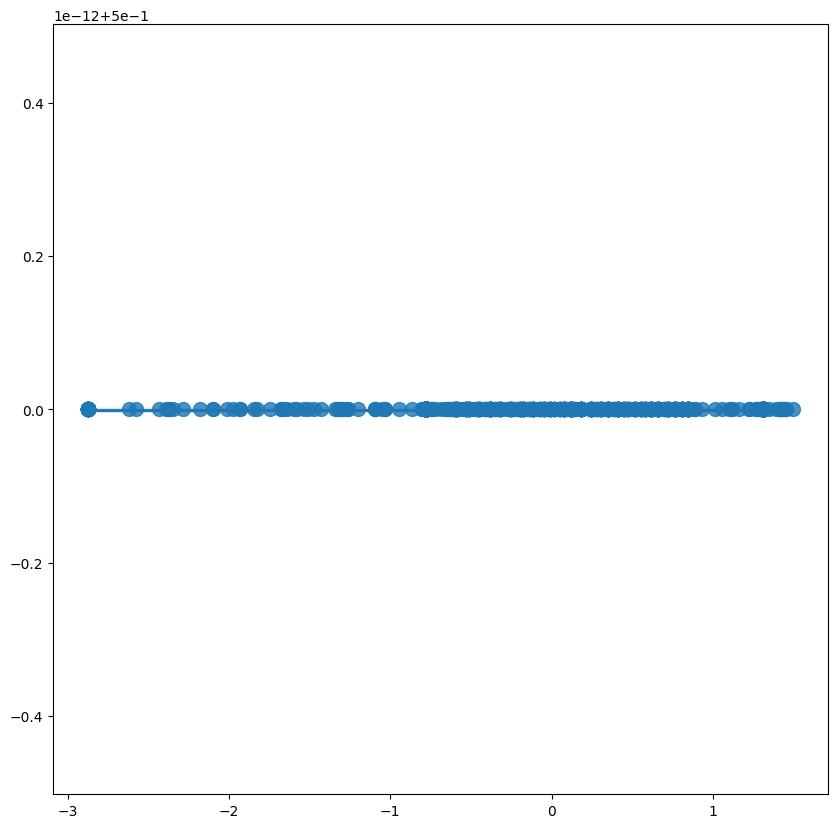

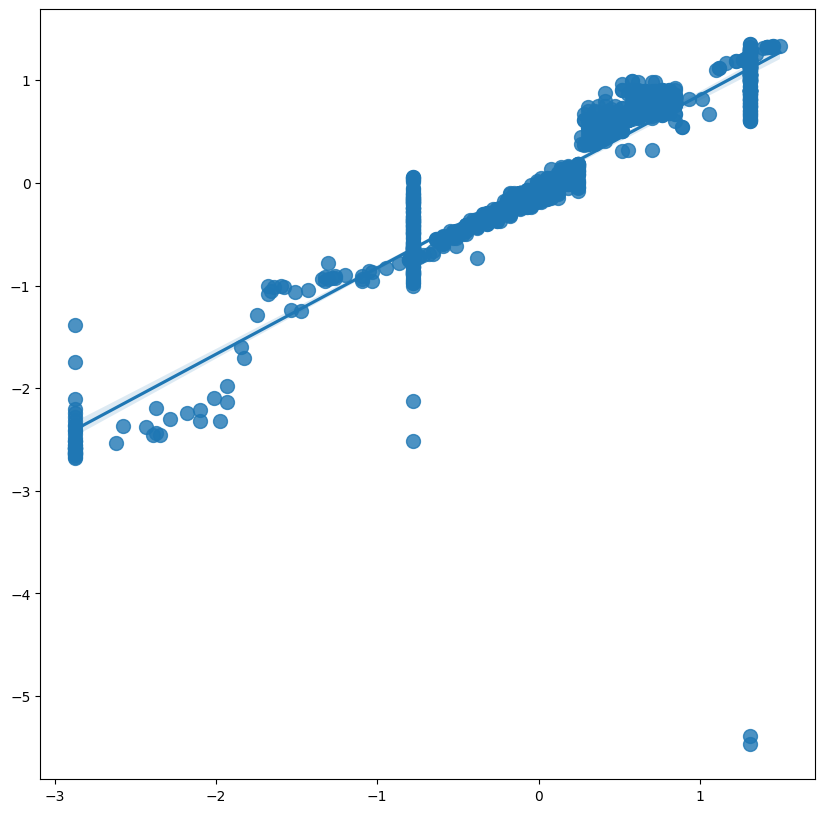

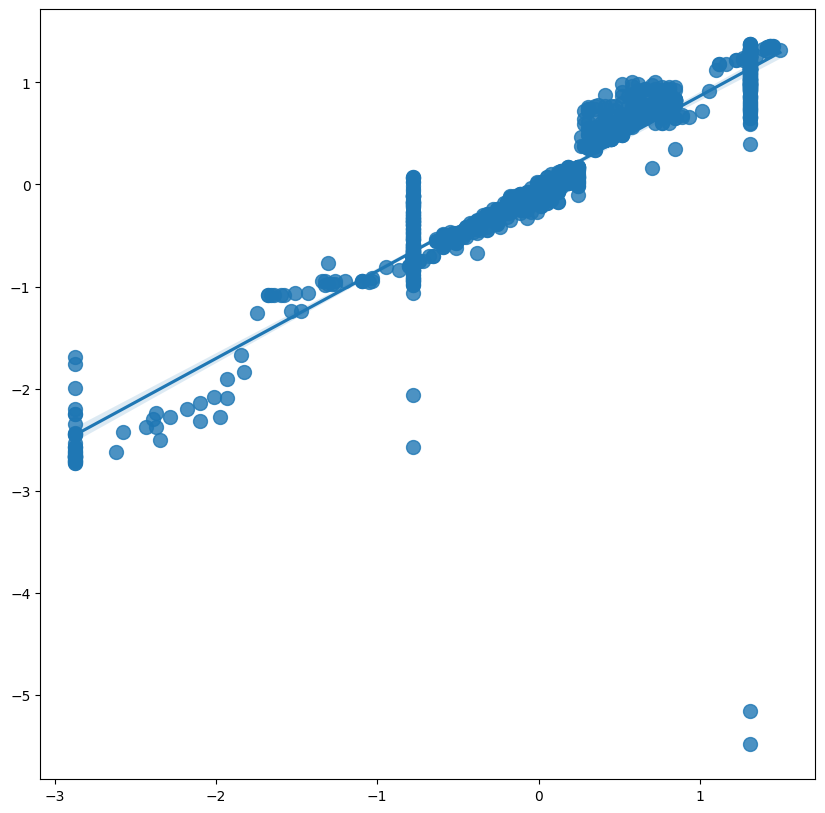

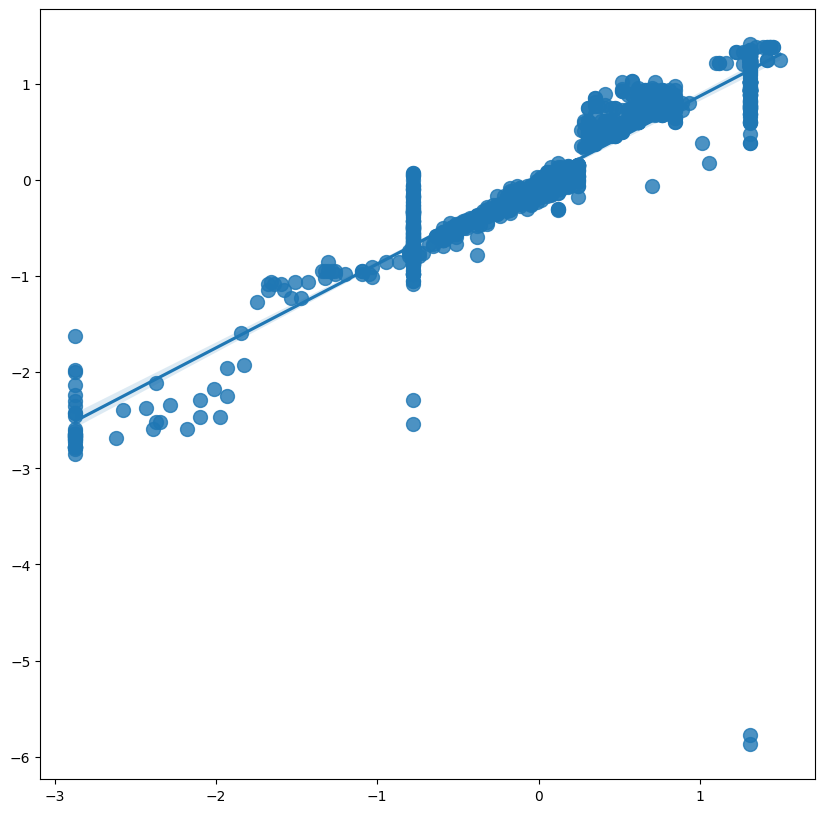

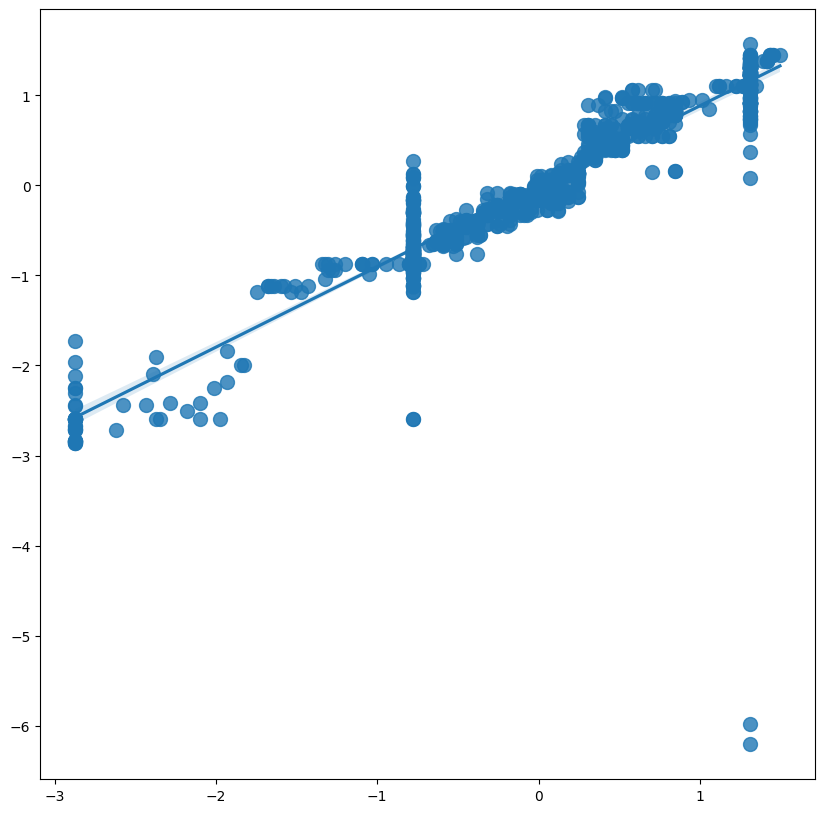

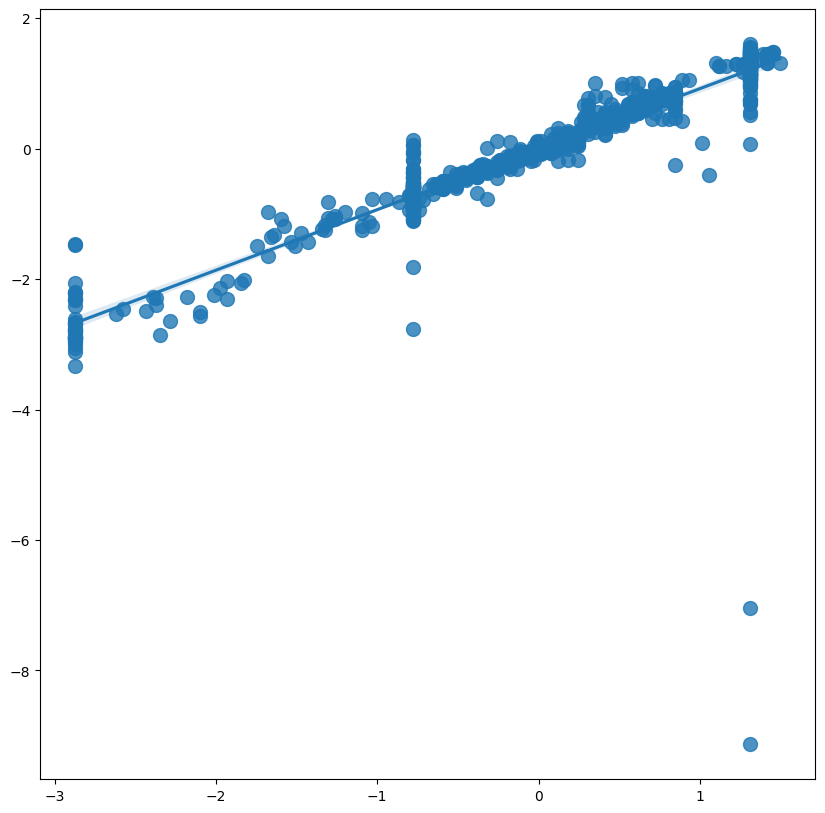

In [135]:
learningRate =  np.linspace(0,1,11)
# estimator = 173
# mdepth = 14
# mchild = 2
# gm = 0
# subsam = 0.8
# colsam = 0.7
alp = np.linspace(0,1,11)
globCnt = 1000
v = 0
for j in alp:
  print("Running: ", v)
  v+=1
  
  xgb1 = XGBRegressor(
    learning_rate =j,
#     n_estimators=estimator,
#     max_depth=mdepth,
#     min_child_weight=mchild,
#     gamma=gm,
#     subsample=subsam,
#     colsample_bytree=colsam,
#     reg_alpha=j,
#     nthread=4,
#     scale_pos_weight=1,
    seed=42)

  xgb1.fit(
    X_train, 
    y_train[:,4], 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train[:,4]), (X_test, y_test[:,4])], 
    verbose=True, 
    early_stopping_rounds = 20)



  expected_y, predicted_y = y_test[:,4], xgb1.predict(X_test)
  pre = predicted_y
  y = y_test[:,4]
#   print(predicted_y)
#   print(y)
  cnt=0
  for p in range(len(pre)):
    # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
    cnt = cnt + abs(y[p] - pre[p])
  if(cnt<globCnt):
    alp= j
    # print(i)
    print(alp," ------> " , cnt)  
    globCnt=cnt
    plt.figure(figsize=(10,10))
    sns.regplot(x=expected_y, y=predicted_y, fit_reg=True, scatter_kws={"s": 100})

Testing training data

In [ ]:
# predicted_y = xgb1.predict(X_train)
# expected_y = y_train
# plt.figure(figsize=(10,10))
# sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

# pre = xgb1.predict(X_train)
# y = y_train.to_numpy()
# cnt=0
# for i in range(len(pre)):
#   # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
#   cnt = cnt + abs(y[i] - pre[i])
# print('Abs Error :', cnt)  

*XGBoost*

In [111]:
xgb1 = XGBRegressor(
learning_rate =0.8,
seed=42)



In [133]:
xgb1.fit(
X_train, 
y_train[:,4], 
eval_metric="rmse", 
eval_set=[(X_train, y_train[:,4]), (X_test, y_test[:,4])], 
verbose=True, 
early_stopping_rounds = 20)



expected_y, predicted_y = y_test[:,4], xgb1.predict(X_test)
pre = predicted_y

[0]	validation_0-rmse:0.47977	validation_1-rmse:0.46988
[1]	validation_0-rmse:0.40848	validation_1-rmse:0.40252
[2]	validation_0-rmse:0.34052	validation_1-rmse:0.39661
[3]	validation_0-rmse:0.30032	validation_1-rmse:0.44925
[4]	validation_0-rmse:0.27072	validation_1-rmse:0.59347
[5]	validation_0-rmse:0.23364	validation_1-rmse:0.56562
[6]	validation_0-rmse:0.22987	validation_1-rmse:0.56538
[7]	validation_0-rmse:0.21735	validation_1-rmse:0.59339
[8]	validation_0-rmse:0.20719	validation_1-rmse:0.58374
[9]	validation_0-rmse:0.20180	validation_1-rmse:0.57838
[10]	validation_0-rmse:0.19354	validation_1-rmse:0.65071
[11]	validation_0-rmse:0.18674	validation_1-rmse:0.64893
[12]	validation_0-rmse:0.17585	validation_1-rmse:0.64788
[13]	validation_0-rmse:0.17101	validation_1-rmse:0.64770
[14]	validation_0-rmse:0.16567	validation_1-rmse:0.64639
[15]	validation_0-rmse:0.16013	validation_1-rmse:0.64654
[16]	validation_0-rmse:0.15498	validation_1-rmse:0.64539
[17]	validation_0-rmse:0.15180	validation

C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Administrator\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Abs Error : 210.17801716975677


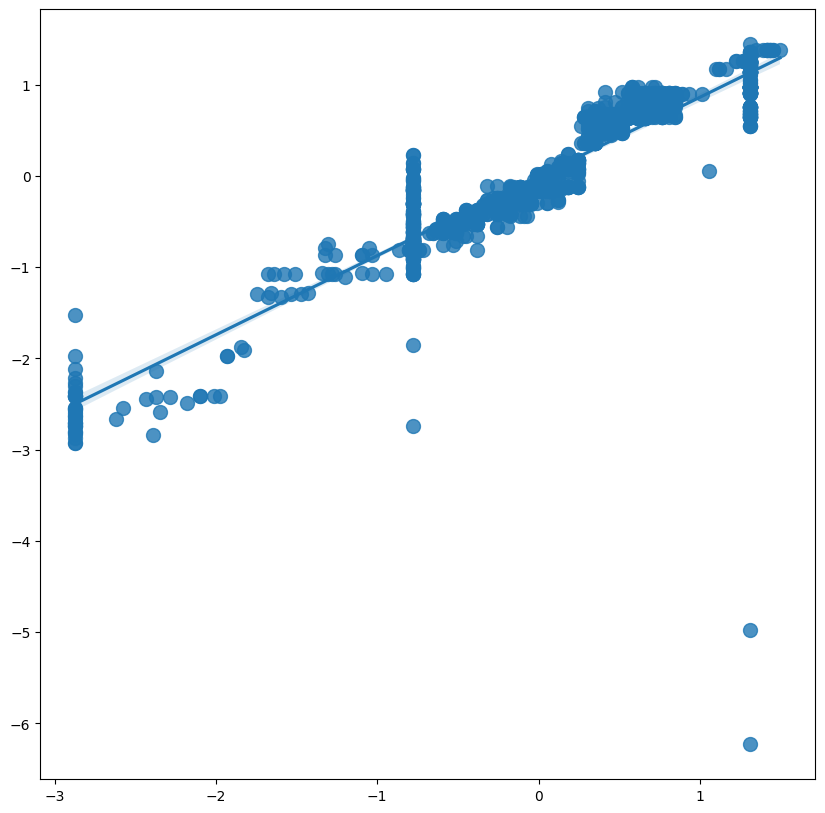

In [134]:
predicted_y = xgb1.predict(X_test)
expected_y = y_test[:,4]
plt.figure(figsize=(10,10))
k = 645
sns.regplot(x=expected_y, y=predicted_y, fit_reg=True, scatter_kws={"s": 100})

pre = predicted_y
y = y_test[:,4]
cnt=0
for i in range(len(pre)):
#   print(y[i],'\t', pre[i], '\t', abs(y[i] - pre[i]))
  cnt = cnt + abs(y[i] - pre[i])
print('Abs Error :', cnt)  

In [23]:
len(pre)

1108

In [ ]:
    learning_rate =learningRate,
    n_estimators=estimator,
    max_depth=mdepth,
    min_child_weight=mchild,
    gamma=gm,
    subsample=subsam,
    colsample_bytree=colsam,
    reg_alpha=j,
    nthread=4,
    scale_pos_weight=1,

In [57]:
op = 4
ko=-1
colsam = 0.7
alp = np.linspace(0.1,1,10)
globCnt = 1000
v = 0
for j in alp:
  print("Running: ", v)
  v+=1
  
  xgb1 = XGBRegressor(
    learning_rate =0.4,
    n_estimators=34,
    max_depth=15,  
    min_child_weight=1,
    gamma=j,
    seed=42)

  xgb1.fit(
    X_train, 
    y_train[:,op], 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train[:,op]), (X_test, y_test[:,op])], 
    verbose=True, 
    early_stopping_rounds = 20)



  expected_y, predicted_y = y_test, xgb1.predict(X_test)
  pre = predicted_y
  y = y_test[:,op]
  print(pre.shape)
  cnt=0
  for p in range(len(pre)):
    # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
    cnt = cnt + abs(y[p] - pre[p])
  print(j, cnt)  
  if(cnt<globCnt):
    ko= j
    # print(i)
    print(ko," ------> " , cnt)  
    globCnt=cnt
#     plt.figure(figsize=(10,10))
#     sns.regplot(expected_y, predicted_y)

Running:  0
[0]	validation_0-rmse:0.60897	validation_1-rmse:0.55963
[1]	validation_0-rmse:0.39096	validation_1-rmse:0.37716
[2]	validation_0-rmse:0.26175	validation_1-rmse:0.28263
[3]	validation_0-rmse:0.17767	validation_1-rmse:0.22382
[4]	validation_0-rmse:0.12593	validation_1-rmse:0.19588
[5]	validation_0-rmse:0.09777	validation_1-rmse:0.18737
[6]	validation_0-rmse:0.08141	validation_1-rmse:0.18405
[7]	validation_0-rmse:0.07564	validation_1-rmse:0.18149
[8]	validation_0-rmse:0.07196	validation_1-rmse:0.17701
[9]	validation_0-rmse:0.06970	validation_1-rmse:0.17651
[10]	validation_0-rmse:0.06964	validation_1-rmse:0.17637
[11]	validation_0-rmse:0.06962	validation_1-rmse:0.17629
[12]	validation_0-rmse:0.06961	validation_1-rmse:0.17624
[13]	validation_0-rmse:0.06960	validation_1-rmse:0.17621
[14]	validation_0-rmse:0.06960	validation_1-rmse:0.17620
[15]	validation_0-rmse:0.06960	validation_1-rmse:0.17619
[16]	validation_0-rmse:0.06960	validation_1-rmse:0.17618
[17]	validation_0-rmse:0.0696

[19]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[20]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[21]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[22]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[23]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[24]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[25]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[26]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[27]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[28]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[29]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[30]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[31]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[32]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
[33]	validation_0-rmse:0.12457	validation_1-rmse:0.16758
(428,)
0.5 37.05876827791212
Running:  5
[0]	validation_0-rmse:0.61017	validation_1-rmse:0.56088
[1]	validation_0-rmse:0.39444	validation_1-rmse:

[25]	validation_0-rmse:0.14523	validation_1-rmse:0.18740
[26]	validation_0-rmse:0.14523	validation_1-rmse:0.18740
(428,)
0.9 46.034922869299876
Running:  9
[0]	validation_0-rmse:0.61045	validation_1-rmse:0.56125
[1]	validation_0-rmse:0.39671	validation_1-rmse:0.38208
[2]	validation_0-rmse:0.27813	validation_1-rmse:0.28160
[3]	validation_0-rmse:0.20836	validation_1-rmse:0.22177
[4]	validation_0-rmse:0.17738	validation_1-rmse:0.19813
[5]	validation_0-rmse:0.16397	validation_1-rmse:0.18510
[6]	validation_0-rmse:0.16003	validation_1-rmse:0.18065
[7]	validation_0-rmse:0.15802	validation_1-rmse:0.17828
[8]	validation_0-rmse:0.15785	validation_1-rmse:0.17787
[9]	validation_0-rmse:0.15780	validation_1-rmse:0.17765
[10]	validation_0-rmse:0.15778	validation_1-rmse:0.17754
[11]	validation_0-rmse:0.15777	validation_1-rmse:0.17747
[12]	validation_0-rmse:0.15777	validation_1-rmse:0.17743
[13]	validation_0-rmse:0.15776	validation_1-rmse:0.17741
[14]	validation_0-rmse:0.15776	validation_1-rmse:0.17740

In [58]:
ko,globCnt

(0.1, 26.55045941668503)

In [ ]:
reg = GradientBoostingRegressor(
  learning_rate =0.13894736842105262,
  n_estimators=173,
  max_depth=14,
  subsample=0.8,
  loss='squared_error',
  alpha = 0.2,
  random_state = 42)
reg.fit(X_train, y_train)


In [ ]:
predicted_y = reg.predict(X_test)
expected_y = y_test
plt.figure(figsize=(10,10))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

pre = predicted_y
y = y_test.to_numpy()
cnt=0
for i in range(len(pre)):
  print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
  cnt = cnt + abs(y[i] - pre[i])
print('Abs Error :', cnt)  

In [ ]:
# learningRate =  1.0256410256410258
# estimator = 166
# mdepth = 20
# # mchild = np.linspace(1,100,100,dtype=int)
# # gm = 0
# spl = np.linspace(200,100, 100,dtype=int)
# # colsam = 0.7
# # alp = np.linspace(1e-06, 1e-04,15)
# globCnt = 1000
# v = 0
# for j in spl:
#   print("Running: ", v)
#   v+=1
  
#   reg = GradientBoostingRegressor(
#     learning_rate =learningRate,
#     n_estimators=estimator,
#     max_depth = mdepth,
#     criterion = 'friedman_mse',
#     min_samples_split = 0.1,
#     min_weight_fraction_leaf = 0,
#     min_impurity_decrease = 0,
#     alpha = 0.2,
#     max_leaf_nodes = 33,
#     validation_fraction = 0.6)

#   reg.fit(X_train, y_train)



#   expected_y, predicted_y = y_test, reg.predict(X_test)
#   pre = predicted_y
#   y = y_test.to_numpy()
#   cnt=0
#   for p in range(len(pre)):
#     # print(y[i][0],'\t', pre[i], '\t', abs(y[i] - pre[i]))
#     cnt = cnt + abs(y[p] - pre[p])
#   if(cnt<globCnt):
#     alp= j
#     # print(i)
#     print(alp," ------> " , cnt)  
#     globCnt=cnt
#     # plt.figure(figsize=(10,10))
#     # sns.regplot(expected_y, predicted_y)

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train[tar[4]])